# ***Assignment 1***

***Muhammad Ibrahim   4605***

***Sara Ayman   4790***

***Jomana Hossam   5155***

# ***Face recognition***

***Generate the Data Matrix and the Label vector***

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

from google.colab import drive
drive.mount('/content/drive')

D=[]    #Data Matrix D
y=[]    #Label vector y

for i in range(1,41):
    images = os.listdir('/content/drive/MyDrive/Colab Notebooks/Dataset/s'+str(i))

    for image in images:
        img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset/s'+str(i)+"/"+image,0)
        height1, width1 = img.shape[:2]
        img_col = np.array(img, dtype='float64').flatten()    #Return a copy of the array collapsed into one dimension = 10304
        D.append(img_col)                                     #Stack the 400 vectors into a single Data Matrix D
        subject = int(i)
        y.append(subject)                                     #List Of Subject's Label y

print("Length Of Matrix D = ",len(D))             #rows=400
print("Size Of Each Image Vector = ",len(D[0]))   #columns=10304
print("Data Matrix D {} x {}".format(len(D),len(D[0])))
print("Length Of Label Vector y = ",len(y))
print("Label vector y = ",y)

Mounted at /content/drive
Length Of Matrix D =  400
Size Of Each Image Vector =  10304
Data Matrix D 400 x 10304
Length Of Label Vector y =  400
Label vector y =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24

***Split the Dataset into Training and Test sets***

In [ ]:
#print('Data Matrix = ',D)
X_train=D[1::2] #select only odds rows
#print('X training data = ',X_train)
print('Size of training data = ',len(X_train))
X_test=D[::2] #select only even rows 
#print('X test data = ',X_test)
print('Size of test data = ',len(X_test))

#Split the labels vector accordingly

y_train=y[1::2] #select only odds rows
#print('y train = ',y_train)
y_test=y[::2]   #select only even rows 
#print('y test = ',y_test)

Size of training data =  200
Size of test data =  200


***Classification using PCA***

In [ ]:
n= len(X_train)             #no of rows
mean = (sum(X_train))/n     #Compute mean
Z= X_train - 1 *mean.T      #Center the data  
cov_mat = ( Z.T @ Z )/n     #Compute covariance matrix
print('cov_mat = ',cov_mat.shape)

# Simple Python code for check a matrix is 
# symmetric or not. 

# Fills transpose of mat[N][N] in tr[N][N] 
def transpose(mat, tr, N): 
	for i in range(N): 
		for j in range(N): 
			tr[i][j] = mat[j][i] 

# Returns true if mat[N][N] is symmetric, else false 
def isSymmetric(mat, N): 
	
	tr = [ [0 for j in range(len(mat[0])) ] for i in range(len(mat)) ] 
	transpose(mat, tr, N) 
	for i in range(N): 
		for j in range(N): 
			if (mat[i][j] != tr[i][j]): 
				return False
	return True

# Driver code 

if (isSymmetric(cov_mat, 10304)): 
	print('yess') 
else: 
	print ("No")

cov_mat =  (10304, 10304)
yess


***Eigenvalues & Vector Calculation***

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)
print('Eignvalues calculated.')

Eignvalues calculated.


In [ ]:
v2 = sum(eigenvalues)
len_d = len(eigenvalues)
sortedIndices = eigenvalues.argsort()[::-1]
sortedEigenValues = eigenvalues[sortedIndices]
sortedEigenVectors = eigenvectors[:, sortedIndices]

***Projection Matrix Calculation***

In [ ]:
alphas= [0.8, 0.85, 0.9,0.95]

projectedTraining = []
projectedTest = []

for j in range(0, 4):
  rList = []
  alpha = alphas[j]
  print('current alpha=', alpha)
  for i in range(0, len_d): # calculate v1 for each r
    temp = sortedEigenValues[0:i]  
    v1 = sum(temp)
    rList.append(v1/v2)
  rList.sort()
  print(rList)
  smallest_r = 0.0;
  for i in range(0, len(rList)):
    if rList[i] >= alpha:
      smallest_r = i
      break
  print('smallest r=', smallest_r)
  Ur_transpose= np.array(sortedEigenVectors.transpose()[:,:smallest_r])
 
  print(Ur_transpose.shape)
  #print(sortedEigenVectors.shape)
  projectedTraining.append(np.dot(X_train,Ur_transpose.transpose()))
  projectedTest.append(np.dot(X_test,Ur_transpose.transpose()))



current alpha= 0.8
[0.0, 0.171722522287757, 0.3056469206191022, 0.37903457348462927, 0.43447800533054115, 0.4867175063401966, 0.5195924689873309, 0.5454535213553023, 0.5707873441471868, 0.5912540082853303, 0.6100558168635715, 0.6258497292295727, 0.6403574916342735, 0.6525179408333679, 0.6640189854408998, 0.6747154397097459, 0.6841505395133488, 0.693342077834071, 0.7020315750658057, 0.7096285212183758, 0.7169086114606906, 0.7237015036066307, 0.7303630044443329, 0.7368146624843612, 0.7429103464630732, 0.7489167717736201, 0.7544738750931683, 0.7597182540713058, 0.7648715310486812, 0.7699153542975663, 0.7748414299896963, 0.7795544251716617, 0.7842110360280554, 0.7886978652986427, 0.7928833798013059, 0.7969812902011055, 0.8009738669863804, 0.8048525093291561, 0.8085794970944078, 0.8121850865882705, 0.815615202221792, 0.8190241958029914, 0.8223443131381882, 0.8255865050996889, 0.8287522550305345, 0.8318760712721659, 0.8348722148819726, 0.8377395895703791, 0.8405617883191413, 0.84335216516501

***KNN Classifier*** 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#from the lecture
Accuracy0pt80 =[]
Accuracy0pt85 =[]
Accuracy0pt90 =[]
Accuracy0pt95 =[]

AccuracyPoints = []

Neighbours = [1,3,5,7]
for j in range(0, 4):
  for k in range(0,4):
    myProjectionTraining = projectedTraining[j] # for each alpha
    myProjectionTesting = projectedTest[j] # for each alpha
    currentNeighbour = Neighbours[k] # 1 or 3 or 5 or 7
    #Classifier
    classifier = KNeighborsClassifier(n_neighbors=currentNeighbour) # currentNeighbour=K (1,3,5,7) da aly howa al k hna
    classifier.fit(myProjectionTraining, y_train)
    y_pred = classifier.predict(myProjectionTesting)
    acc = accuracy_score(y_test, y_pred)
    if k == 0:
        AccuracyPoints.append(acc) # Simple classifier (alpha =0.80, 0.85, 0.90, 0.95), k (currentNeighbour)=1)
    
    print('accuracy [ K = {} ] : {}'.format(currentNeighbour,round(acc,2)),' - alpha : {}'.format(alphas[j]))
    if j == 0:
        Accuracy0pt80.append(acc)# (alpha =0.80, k (currentNeighbour)=1,3,5,7)
    elif j == 1:
        Accuracy0pt85.append(acc)# (alpha =0.85, k (currentNeighbour)=1,3,5,7)
    elif j == 2:
        Accuracy0pt90.append(acc)# (alpha =0.90, k (currentNeighbour)=1,3,5,7)
    elif j == 3:
        Accuracy0pt95.append(acc)# (alpha =0.95, k (currentNeighbour)=1,3,5,7)


accuracy [ K = 1 ] : 0.93  - alpha : 0.8
accuracy [ K = 3 ] : 0.85  - alpha : 0.8
accuracy [ K = 5 ] : 0.78  - alpha : 0.8
accuracy [ K = 7 ] : 0.73  - alpha : 0.8
accuracy [ K = 1 ] : 0.92  - alpha : 0.85
accuracy [ K = 3 ] : 0.84  - alpha : 0.85
accuracy [ K = 5 ] : 0.76  - alpha : 0.85
accuracy [ K = 7 ] : 0.74  - alpha : 0.85
accuracy [ K = 1 ] : 0.92  - alpha : 0.9
accuracy [ K = 3 ] : 0.84  - alpha : 0.9
accuracy [ K = 5 ] : 0.76  - alpha : 0.9
accuracy [ K = 7 ] : 0.74  - alpha : 0.9
accuracy [ K = 1 ] : 0.92  - alpha : 0.95
accuracy [ K = 3 ] : 0.84  - alpha : 0.95
accuracy [ K = 5 ] : 0.77  - alpha : 0.95
accuracy [ K = 7 ] : 0.73  - alpha : 0.95


***Plots***

[0.93, 0.925, 0.92, 0.92]


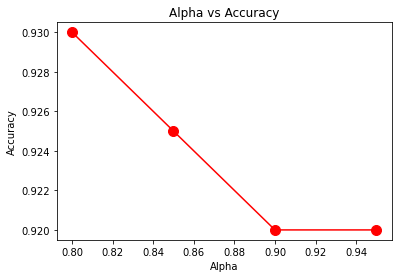

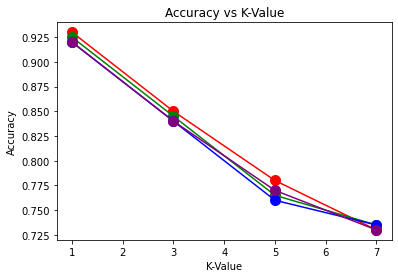

In [ ]:
print(AccuracyPoints)
plt.figure(1)
plt.plot(alphas,AccuracyPoints,  color='red', linestyle='solid', marker='o',
          markerfacecolor='red', markersize=10)

plt.title('Alpha vs Accuracy') # simple classifier
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.show()

plt.figure(2)
plt.plot([1,3,5,7],Accuracy0pt80,  color='  ', linestyle='solid', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot([1,3,5,7],Accuracy0pt85,  color='green', linestyle='solid', marker='o',
         markerfacecolor='green', markersize=10)

plt.plot([1,3,5,7],Accuracy0pt90,  color='blue', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=10)

plt.plot([1,3,5,7],Accuracy0pt95,  color='purple', linestyle='solid', marker='o',
         markerfacecolor='purple', markersize=10)
plt.title('Accuracy vs K-Value')
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.show()

# ***Bonus***

***Generate the Data Matrix and the Label vector***

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

from google.colab import drive
drive.mount('/content/drive')

D=[]    #Data Matrix D
y=[]    #Label vector y

for i in range(1,41):
    images = os.listdir('/content/drive/MyDrive/Colab Notebooks/Dataset/s'+str(i))

    for image in images:
        img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset/s'+str(i)+"/"+image,0)
        height1, width1 = img.shape[:2]
        img_col = np.array(img, dtype='float64').flatten()    #Return a copy of the array collapsed into one dimension = 10304
        D.append(img_col)                                     #Stack the 400 vectors into a single Data Matrix D
        subject = int(i)
        y.append(subject)                                     #List Of Subject's Label y

print("Length Of Matrix D = ",len(D))             #rows=400
print("Size Of Each Image Vector = ",len(D[0]))   #columns=10304
print("Data Matrix D {} x {}".format(len(D),len(D[0])))
print("Length Of Label Vector y = ",len(y))
print("Label vector y = ",y)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Length Of Matrix D =  400
Size Of Each Image Vector =  10304
Data Matrix D 400 x 10304
Length Of Label Vector y =  400
Label vector y =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21,

***Split the Dataset into Training and Test sets***

In [ ]:
from sklearn.model_selection import train_test_split

preYLabels=np.arange(1,41)                                                      #Matrix form 1 to 40 for each person
Y=np.repeat(preYLabels,10)                                                      #Repeat each element in array 
Y=np.reshape(Y,(400,1))

#print('Data Matrix = ',D)
X_train, X_test, y_train, y_test = train_test_split(D, Y, test_size=0.3,stratify=Y)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
print('X training data = ',X_train.shape)
print('X test data = ',X_test.shape)
#Split the labels vector accordingly
print('y train = ',y_train.shape)
print('y test = ',y_test.shape)

X training data =  (280, 10304)
X test data =  (120, 10304)
y train =  (280, 1)
y test =  (120, 1)


***Classification using PCA***

In [ ]:
n= len(X_train)             #no of rows
mean = (sum(X_train))/n     #Compute mean
Z= X_train - 1 *mean.T      #Center the data  
cov_mat = ( Z.T @ Z )/n     #Compute covariance matrix
print('cov_mat = ',cov_mat.shape)

# Simple Python code for check a matrix is 
# symmetric or not. 

# Fills transpose of mat[N][N] in tr[N][N] 
def transpose(mat, tr, N): 
	for i in range(N): 
		for j in range(N): 
			tr[i][j] = mat[j][i] 

# Returns true if mat[N][N] is symmetric, else false 
def isSymmetric(mat, N): 
	
	tr = [ [0 for j in range(len(mat[0])) ] for i in range(len(mat)) ] 
	transpose(mat, tr, N) 
	for i in range(N): 
		for j in range(N): 
			if (mat[i][j] != tr[i][j]): 
				return False
	return True

# Driver code 

if (isSymmetric(cov_mat, 10304)): 
	print('yess') 
else: 
	print ("No")

cov_mat =  (10304, 10304)
yess


***Eigenvalues & Vector Calculation***

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)
print('Eignvalues calculated.')

Eignvalues calculated.


In [ ]:
v2 = sum(eigenvalues)
len_d = len(eigenvalues)
sortedIndices = eigenvalues.argsort()[::-1]
sortedEigenValues = eigenvalues[sortedIndices]
sortedEigenVectors = eigenvectors[:, sortedIndices]

***Projection Matrix Calculation***

In [ ]:
alphas= [0.8, 0.85, 0.9,0.95]

projectedTraining = []
projectedTest = []

for j in range(0, 4):
  rList = []
  alpha = alphas[j]
  print('current alpha=', alpha)
  for i in range(0, len_d):
    temp = sortedEigenValues[0:i]  
    v1 = sum(temp)
    rList.append(v1/v2)
  rList.sort()
  smallest_r = 0.0;
  for i in range(0, len(rList)):
    if rList[i] >= alpha:
      smallest_r = i
      break
  print('smallest r=', smallest_r)
  Ur_transpose= np.array(sortedEigenVectors.transpose()[:smallest_r])
 
  print(Ur_transpose.shape)
  print(sortedEigenVectors.shape)
  projectedTraining.append(np.dot(X_train,Ur_transpose.transpose()))
  projectedTest.append(np.dot(X_test,Ur_transpose.transpose()))



current alpha= 0.8
smallest r= 40
(40, 10304)
(10304, 10304)
current alpha= 0.85
smallest r= 59
(59, 10304)
(10304, 10304)
current alpha= 0.9
smallest r= 91
(91, 10304)
(10304, 10304)
current alpha= 0.95
smallest r= 148
(148, 10304)
(10304, 10304)


***KNN Classifier*** 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#from the lecture
Accuracy0pt80 =[]
Accuracy0pt85 =[]
Accuracy0pt90 =[]
Accuracy0pt95 =[]

AccuracyPoints = []

Neighbours = [1,3,5,7]
for j in range(0, 4):
  for k in range(0,4):
    myProjectionTraining = projectedTraining[j]
    myProjectionTesting = projectedTest[j]
    currentNeighbour = Neighbours[k]
    #Classifier
    classifier = KNeighborsClassifier(n_neighbors=currentNeighbour)
    classifier.fit(myProjectionTraining, y_train)
    y_pred = classifier.predict(myProjectionTesting)
    acc = accuracy_score(y_test, y_pred)
    if k==0:
        AccuracyPoints.append(acc)
    print('accuracy [ K = {} ] : {}'.format(currentNeighbour,round(acc,2)),' - alpha : {}'.format(alphas[j]))
    if j == 0:
        Accuracy0pt80.append(acc)
    elif j == 1:
        Accuracy0pt85.append(acc)
    elif j == 2:
        Accuracy0pt90.append(acc)
    elif j == 3:
        Accuracy0pt95.append(acc)


accuracy [ K = 1 ] : 0.95  - alpha : 0.8
accuracy [ K = 3 ] : 0.92  - alpha : 0.8
accuracy [ K = 5 ] : 0.92  - alpha : 0.8
accuracy [ K = 7 ] : 0.88  - alpha : 0.8
accuracy [ K = 1 ] : 0.97  - alpha : 0.85
accuracy [ K = 3 ] : 0.92  - alpha : 0.85
accuracy [ K = 5 ] : 0.92  - alpha : 0.85
accuracy [ K = 7 ] : 0.88  - alpha : 0.85
accuracy [ K = 1 ] : 0.98  - alpha : 0.9
accuracy [ K = 3 ] : 0.92  - alpha : 0.9
accuracy [ K = 5 ] : 0.92  - alpha : 0.9
accuracy [ K = 7 ] : 0.88  - alpha : 0.9
accuracy [ K = 1 ] : 0.97  - alpha : 0.95
accuracy [ K = 3 ] : 0.92  - alpha : 0.95
accuracy [ K = 5 ] : 0.91  - alpha : 0.95
accuracy [ K = 7 ] : 0.85  - alpha : 0.95


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed

***Plots***

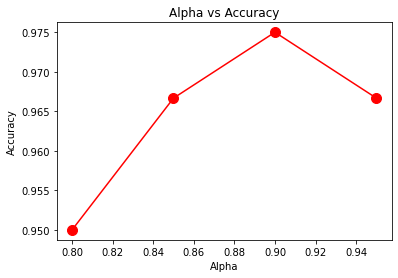

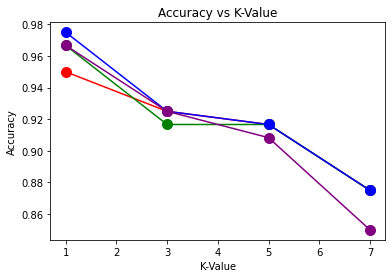

In [ ]:
#print(AccuracyPoints)
plt.figure(1)
plt.plot(alphas,AccuracyPoints,  color='red', linestyle='solid', marker='o',
          markerfacecolor='red', markersize=10)

plt.title('Alpha vs Accuracy')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.show()

plt.figure(2)
plt.plot([1,3,5,7],Accuracy0pt80,  color='red', linestyle='solid', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot([1,3,5,7],Accuracy0pt85,  color='green', linestyle='solid', marker='o',
         markerfacecolor='green', markersize=10)

plt.plot([1,3,5,7],Accuracy0pt90,  color='blue', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=10)

plt.plot([1,3,5,7],Accuracy0pt95,  color='purple', linestyle='solid', marker='o',
         markerfacecolor='purple', markersize=10)
plt.title('Accuracy vs K-Value')
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.show()